In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/name_mapping_validation_data.csv
/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/survival_evaluation.csv
/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_flair.nii
/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_t2.nii
/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_t1ce.nii
/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_084/BraTS20_Validation_084_t1.nii
/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_Br

In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#ml models
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
import tensorflow as tf
import keras 
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import *
import cv2 
# neural imaging
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt

In [30]:
train_path='../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
val_path='../input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'

In [31]:
#/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_297/BraTS20_Training_297_flair.nii
#/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_120/BraTS20_Validation_120_flair.nii

In [32]:
test_image_flair=nib.load(train_path + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii')
test_image_t1=nib.load(train_path + 'BraTS20_Training_001/BraTS20_Training_001_t1.nii')
test_image_t1ce=nib.load(train_path + 'BraTS20_Training_001/BraTS20_Training_001_t1ce.nii')
test_image_t2=nib.load(train_path + 'BraTS20_Training_001/BraTS20_Training_001_t2.nii')
test_mask=nib.load(train_path + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii')

In [33]:
print(test_image_flair,test_image_t1,test_image_t1ce,test_image_t2,test_mask,sep='*'*60)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b   

In [34]:
#convert to numpy array
tif=test_image_flair.get_fdata()
tit1=test_image_t1.get_fdata()
tit1ce=test_image_t1ce.get_fdata()
tit2=test_image_t2.get_fdata()
tm=test_mask.get_fdata()

In [35]:
print(f'type of tif={type(tif)},type of tit1={type(tit1)},type of tit1ce={type(tit1ce)},type of tit2={type(tit2)},type of tm={type(tm)}')

type of tif=<class 'numpy.memmap'>,type of tit1=<class 'numpy.memmap'>,type of tit1ce=<class 'numpy.memmap'>,type of tit2=<class 'numpy.memmap'>,type of tm=<class 'numpy.memmap'>


In [36]:
t2=tif.copy()

Text(0.5, 1.0, 'tm')

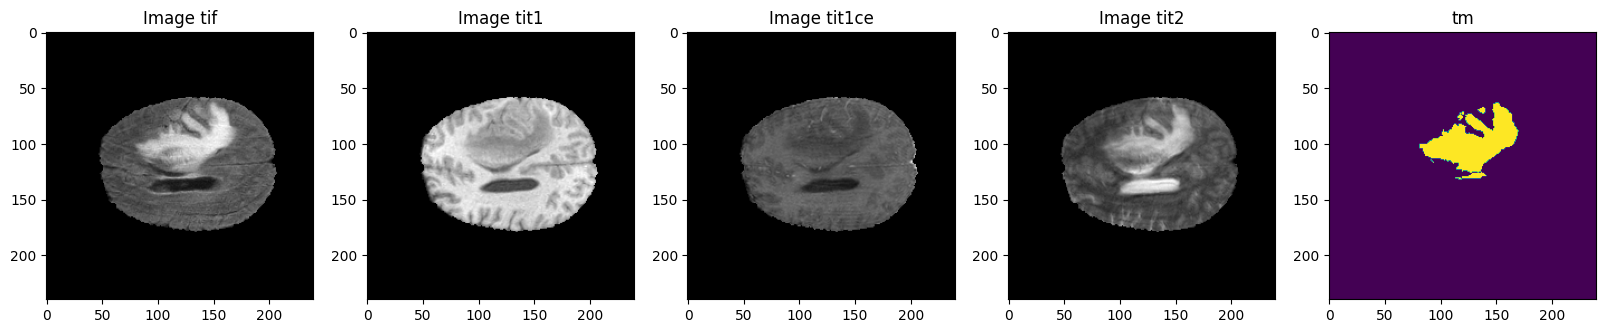

In [37]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 25
ax1.imshow(tif[:,:,tif.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image tif')
ax2.imshow(tit1[:,:,tit1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image tit1')
ax3.imshow(tit1ce[:,:,tit1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image tit1ce')
ax4.imshow(tit2[:,:,tit2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image tit2')
ax5.imshow(tm[:,:,tm.shape[0]//2-slice_w])
ax5.set_title('tm')

In [38]:
#val data
val_flair=nib.load(val_path+'BraTS20_Validation_084/BraTS20_Validation_084_flair.nii')
val_t1=nib.load(val_path+'BraTS20_Validation_084/BraTS20_Validation_084_t1.nii')
val_t1ce=nib.load(val_path+'BraTS20_Validation_084/BraTS20_Validation_084_t1ce.nii')
val_t2=nib.load(val_path+'BraTS20_Validation_084/BraTS20_Validation_084_t2.nii')

In [39]:
print(val_flair,val_t1,val_t1ce,val_t2)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b   

In [40]:
#convert  to numpy array
vf=val_flair.get_fdata()
vt1=val_t1.get_fdata()
vt1ce=val_t1ce.get_fdata()
vt2=val_t2.get_fdata()

In [41]:
#type check 
print(f'type of vf={type(vf)},type of vt1={type(vt1)},type of vt1ce={type(vt1ce)},type of vt2={type(vt2)}')

type of vf=<class 'numpy.memmap'>,type of vt1=<class 'numpy.memmap'>,type of vt1ce=<class 'numpy.memmap'>,type of vt2=<class 'numpy.memmap'>


Text(0.5, 1.0, 'image vt2')

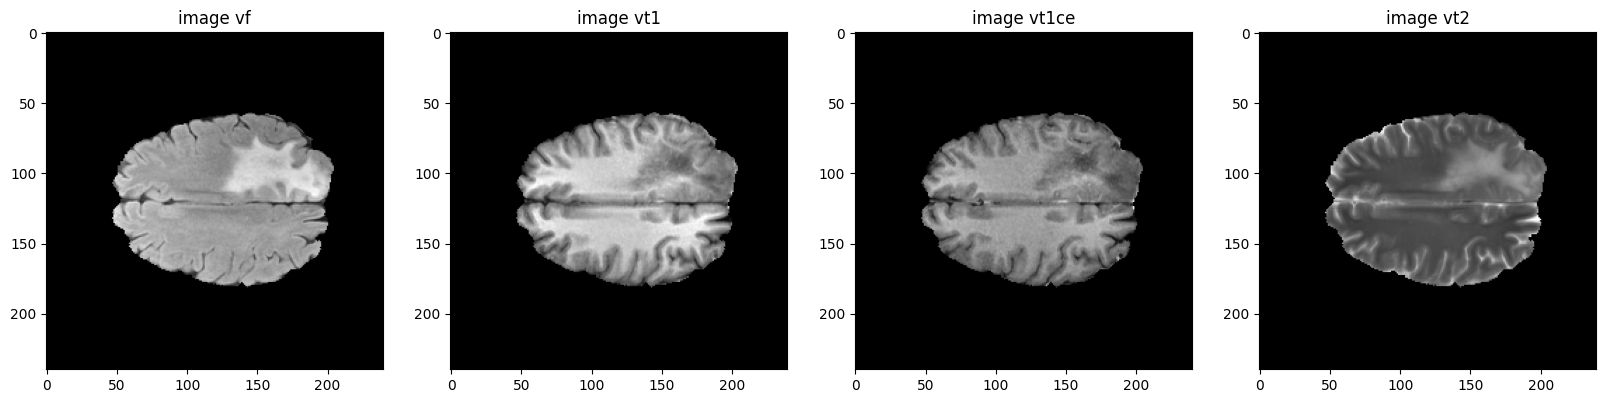

In [42]:
#val images
fig,(axv1,axv2,axv3,axv4)=plt.subplots(1,4,figsize=(20,10))
s_w=25
axv1.imshow(vf[:,:,vf.shape[0]//2-s_w], cmap = 'gray')
axv1.set_title("image vf")
axv2.imshow(vt1[:,:,vt1.shape[0]//2-s_w], cmap = 'gray')
axv2.set_title("image vt1")
axv3.imshow(vt1ce[:,:,vt1ce.shape[0]//2-s_w], cmap = 'gray')
axv3.set_title(("image vt1ce"))
axv4.imshow(vt2[:,:,vt2.shape[0]//2-s_w], cmap='gray')
axv4.set_title(("image vt2"))

In [43]:
#full data having train test and val paths
train_val_dir=[]
def total_dire(path):
    for f in os.scandir(path):
        if f.is_dir():
            train_val_dir.append(f.path)
    return train_val_dir
total_dire(train_path)

['../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_337',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_161',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_198',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_284',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_169',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_157',
 '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_073',
 '../input/brats

In [44]:
train_val_dir.remove(train_path+'BraTS20_Training_355')

In [45]:
#get the train tets and val ids 
def pathList(fullpaths):
    path=[]
    for i in range(len(fullpaths)):
        path.append(fullpaths[i][fullpaths[i].rfind('/')+1:])
    return path

In [46]:
train_test_val_ids=pathList(train_val_dir)#all data
train_test_ids,val_ids=train_test_split(train_test_val_ids,test_size=0.2)
train_ids,test_ids=train_test_split(train_test_ids,test_size=0.2)

In [47]:
len(train_ids)

235

In [48]:
IMG_SIZE=128
VOLUME_SLICES = 100 
VOLUME_START_AT = 22

In [49]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))

        
        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(train_path, i)

            data_path = os.path.join(case_path, f'{i}_flair.nii');
            flair = nib.load(data_path).get_fdata()    

            data_path = os.path.join(case_path, f'{i}_t1ce.nii');
            ce = nib.load(data_path).get_fdata()
            
            data_path = os.path.join(case_path, f'{i}_seg.nii');
            seg = nib.load(data_path).get_fdata()
        
            for j in range(VOLUME_SLICES):
                X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
                X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

                y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
                    
        # Generate masks
        y[y==4] = 3;
        mask = tf.one_hot(y, 4);
        mask = tf.one_hot(y, 4);
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        return X/np.max(X), Y
        
training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)

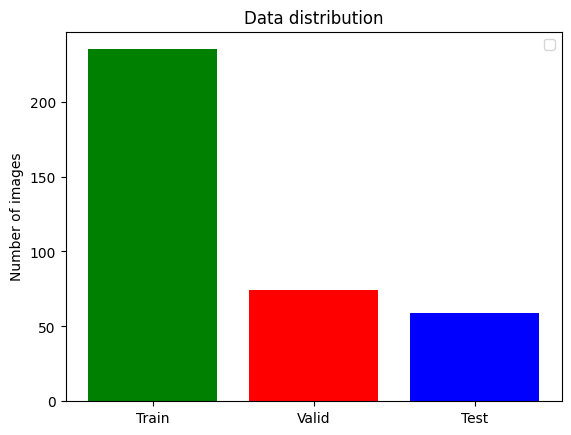

In [50]:
# show number of data for each dir 
def showDataLayout():
    plt.bar(["Train","Valid","Test"],
    [len(train_ids), len(val_ids), len(test_ids)], align='center',color=[ 'green','red', 'blue'])
    plt.legend()

    plt.ylabel('Number of images')
    plt.title('Data distribution')

    plt.show()
    
showDataLayout()

In [51]:
def Autoencoders(input_shape):
    inputs=Input(shape=input_shape)
    #nonlinear model
    #Encoder
    conv1=Conv2D(32,(3,3),activation='relu',padding='same')(inputs)
    pool1=MaxPooling2D((2, 2))(conv1)
    conv2=Conv2D(64,(3,3),activation='relu',padding='same')(pool1)
    pool2=MaxPooling2D((2,2))(conv2)
    conv3=Conv2D(128,(3,3),activation='relu',padding='same')(pool2)
    pool3=MaxPooling2D((2,2))(conv3)
    conv4=Conv2D(256,(3,3),activation='relu',padding='same')(pool3)
    pool4=MaxPooling2D((2,2))(conv4)
    #Bottleneck
    conv5=Conv2D(512,(3,3),activation='relu',padding='same')(pool4)
    #decoder
    us1=UpSampling2D((2,2))(conv5)
    conv6=Conv2D(256,(3,3),activation='relu',padding='same')(us1)
    us2=UpSampling2D((2,2))(conv6)
    conv7=Conv2D(128,(3,3),activation='relu',padding='same')(us2)
    us3=UpSampling2D((2,2))(conv7)
    conv8=Conv2D(64,(3,3),activation='relu',padding='same')(us3)
    up4=UpSampling2D((2,2))(conv8)
    conv9=Conv2D(32,(3,3),activation='relu',padding='same')(up4)
    outputs = Conv2D(4, (1, 1), activation='softmax')(conv9)
    auto_enco=Model(inputs,outputs)
    auto_enco.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return auto_enco
input_shape=(IMG_SIZE,IMG_SIZE,2)
auto_enco_model=Autoencoders(input_shape)
auto_enco_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 4)    │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,135,620 (11.96 MB)

 Trainable params: 3,135,620 (11.96 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history=auto_enco_model.fit(
    training_generator,
    epochs=40,
    validation_data=valid_generator
)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 121s 481ms/step - accuracy: 0.9778 - loss: 0.1999 - val_accuracy: 0.9819 - val_loss: 0.0739
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 119s 495ms/step - accuracy: 0.9840 - loss: 0.0633 - val_accuracy: 0.9819 - val_loss: 0.0568
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 459ms/step - accuracy: 0.9843 - loss: 0.0562 - val_accuracy: 0.9827 - val_loss: 0.0631
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 438ms/step - accuracy: 0.9849 - loss: 0.0500 - val_accuracy: 0.9828 - val_loss: 0.0523
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 416ms/step - accuracy: 0.9847 - loss: 0.0492 - val_accuracy: 0.9839 - val_loss: 0.0481
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 414ms/step - accuracy: 0.9856 - loss: 0.0441 - val_accuracy: 0.9836 - val_loss: 0.0510
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 402ms/step - accuracy: 0.9840 - loss: 0.0513 - val_accuracy: 0.9848 - val_loss: 0.0452
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 423ms/step - accuracy: 0.9870 - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 603ms/step - accuracy: 0.9894 - loss: 0.0276 - val_accuracy: 0.9870 - val_loss: 0.0370
Epoch 29/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 630ms/step - accuracy: 0.9897 - loss: 0.0262 - val_accuracy: 0.9867 - val_loss: 0.0382
Epoch 30/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 162s 681ms/step - accuracy: 0.9895 - loss: 0.0274 - val_accuracy: 0.9872 - val_loss: 0.0364
Epoch 31/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 153s 636ms/step - accuracy: 0.9898 - loss: 0.0265 - val_accuracy: 0.9866 - val_loss: 0.0423
Epoch 32/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 616ms/step - accuracy: 0.9893 - loss: 0.0283 - val_accuracy: 0.9864 - val_loss: 0.0376
Epoch 33/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 157s 653ms/step - accuracy: 0.9893 - loss: 0.0286 - val_accuracy: 0.9873 - val_loss: 0.0387
Epoch 34/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 158s 661ms/step - accuracy: 0.9911 - loss: 0.0228 - val_accuracy: 0.9874 - val_loss: 0.0381
Epoch 35/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 152s 634ms/step - accuracy: 0.9912 - los

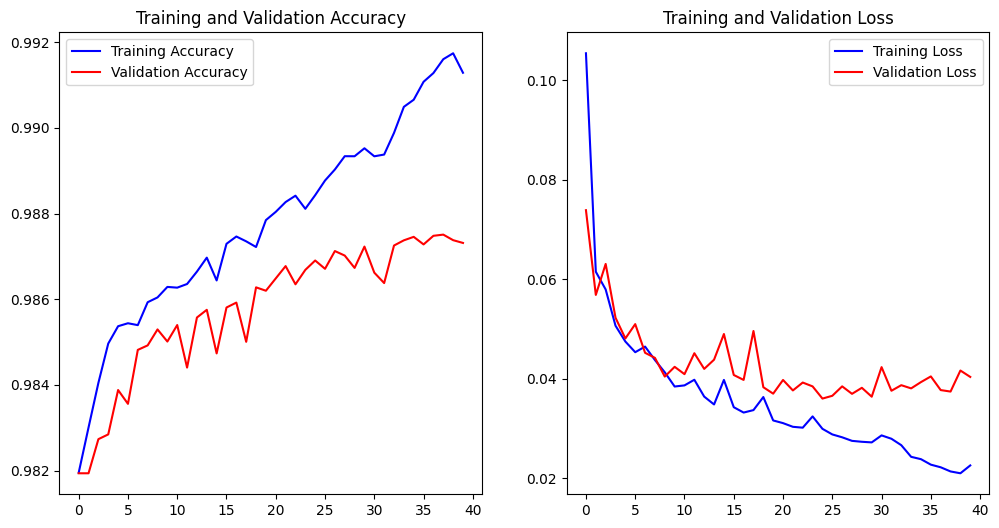

In [53]:
def plot_history(history):
    acc=history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.savefig("Training_and_Validation_Accuracy.jpg")
    plt.legend()
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.savefig("training_and_validation_losss.jpg")
    plt.legend()

    plt.show()

# Plot the training history
plot_history(history)